# Olympics

### A1 - Leer Datasets
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils

In [3]:
datos_atletas=pd.read_csv('res/atletas.csv',engine='python')
datos_atletas.sample(8)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257551,128974,"Joshua John ""Josh"" Watson",M,23.0,184.0,80.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Silver
127221,64139,Kanokwan Krittakom,F,21.0,161.0,50.0,Thailand,THA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN
240323,120427,Tin Maung Ni,M,22.0,167.0,62.0,Myanmar,MYA,1960 Summer,1960,Summer,Roma,Swimming,"Swimming Men's 1,500 metres Freestyle",NaN
146777,73668,Gerald Grant Main,M,24.0,189.0,90.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Rowing,Rowing Men's Coxed Eights,Gold
50585,26016,Jos de Carvalho Filho,M,25.0,NaN,NaN,Brazil,BRA,1956 Summer,1956,Summer,Melbourne,Rowing,Rowing Men's Coxed Fours,NaN
149173,74825,Claudio Marchisio,M,22.0,179.0,66.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
95304,48261,Wenche-Lin Mobergslien Hess,F,25.0,171.0,64.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Archery,Archery Women's Individual,NaN
135898,68375,Lynda Caroline Lehmann,F,37.0,166.0,72.0,Australia,AUS,1996 Summer,1996,Summer,Atlanta,Canoeing,"Canoeing Women's Kayak Fours, 500 metres",NaN


In [4]:
datos_atletismo=pd.read_csv('res/atletismo.csv',engine='python',sep=';')
datos_atletismo.head(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


### A2 - Análisis 
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

In [5]:
deportes=[]
for y in range(len(datos_atletas)):
    if datos_atletas.iloc[y]['Season']=='Summer':
        deportes.append(((datos_atletas.iloc[y]['Year']),(datos_atletas.iloc[y]['Sport'])))


In [6]:
data=pd.DataFrame(deportes,columns=['Year','Sport'])
sports=[]
for t in set(data['Year']):
    mask=data['Year']==t
    sports.append((t,len(data[mask]['Sport'].unique())))

Text(0, 0.5, 'Number of sports')

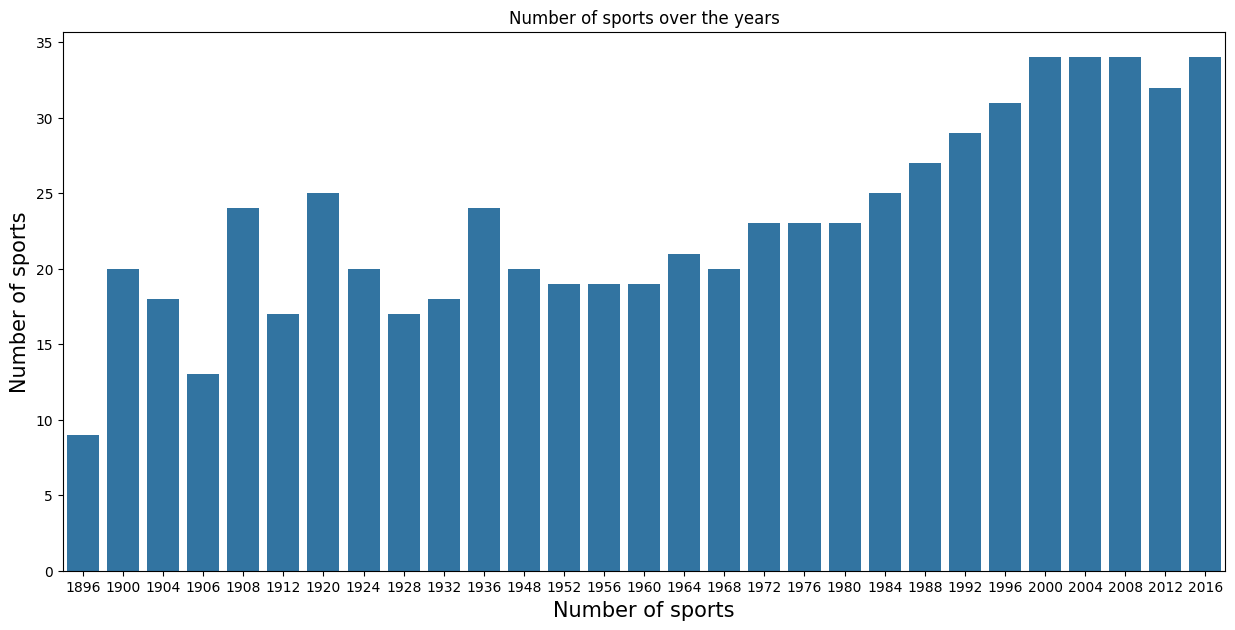

In [7]:
grafo1=pd.DataFrame(sports,columns=['Year','Sports']).sort_values(by='Year',ascending=True)
fig, ax = plt.subplots(figsize = (15, 7))
grafica1=sns.barplot(x='Year',y='Sports',data=grafo1,ax=ax)
grafica1.set_title('Number of sports over the years')

grafica1.set_xlabel('Number of sports',size=15)
grafica1.set_ylabel('Number of sports',size=15)


In [8]:
genero=[]
for i in range(len(datos_atletas)):
    if datos_atletas.iloc[i]['Season']=='Summer':
        genero.append(((datos_atletas.iloc[i]['Year']),(datos_atletas.iloc[i]['Sex'])))

Text(0, 0.5, 'Number of athletes')

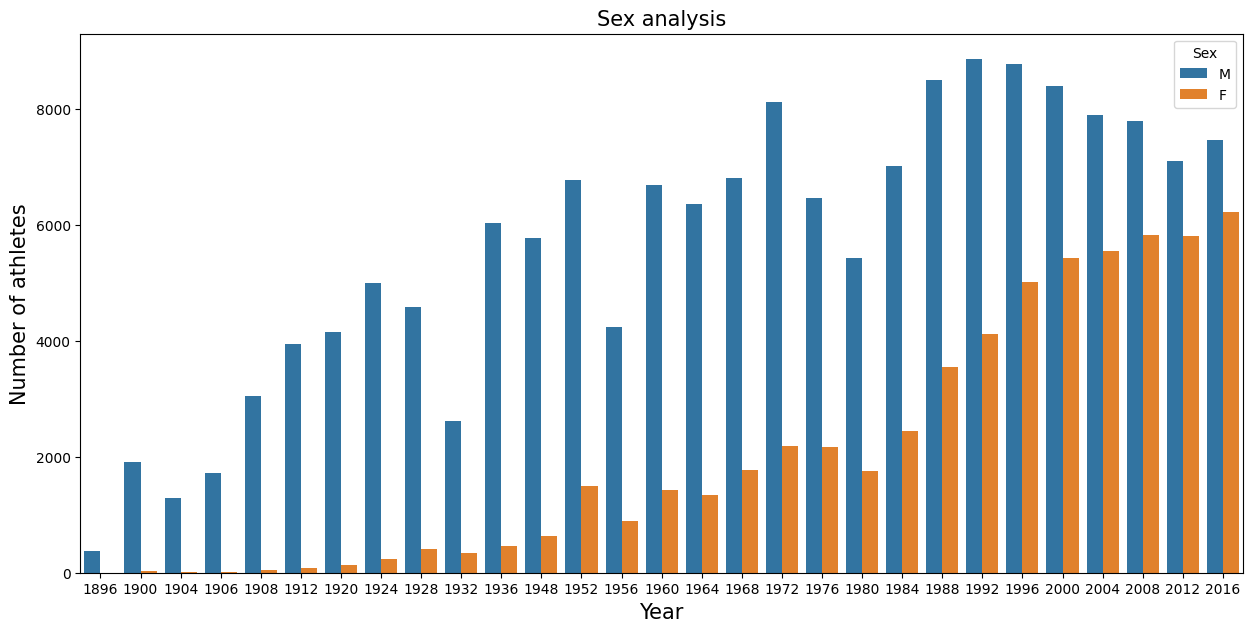

In [9]:
sexo=pd.DataFrame(genero,columns=['Year','Sex'])
fig, ax = plt.subplots(figsize = (15, 7))
grafica2=sns.countplot(x='Year',hue='Sex',data=sexo,ax=ax)
grafica2.set_title('Sex analysis',size=15)

grafica2.set_xlabel('Year',size=15)
grafica2.set_ylabel('Number of athletes',size=15)

In [12]:
datos_atletas['Medal']=datos_atletas['Medal'].fillna(0)
medalla=[]
for y in range(len(datos_atletas)):
    if datos_atletas.iloc[y]['Medal']!=0 and datos_atletas.iloc[y]['Season']=='Summer':
        medalla.append(((datos_atletas.iloc[y]['Team']),(datos_atletas.iloc[y]['Medal'])))

In [13]:
data=pd.DataFrame(medalla,columns=['Pais','Medalla'])
medallero=[]
for t in set(data['Pais']):
    mask=data['Pais']==t
    medallero.append((t,len(data[mask]['Medalla'])))

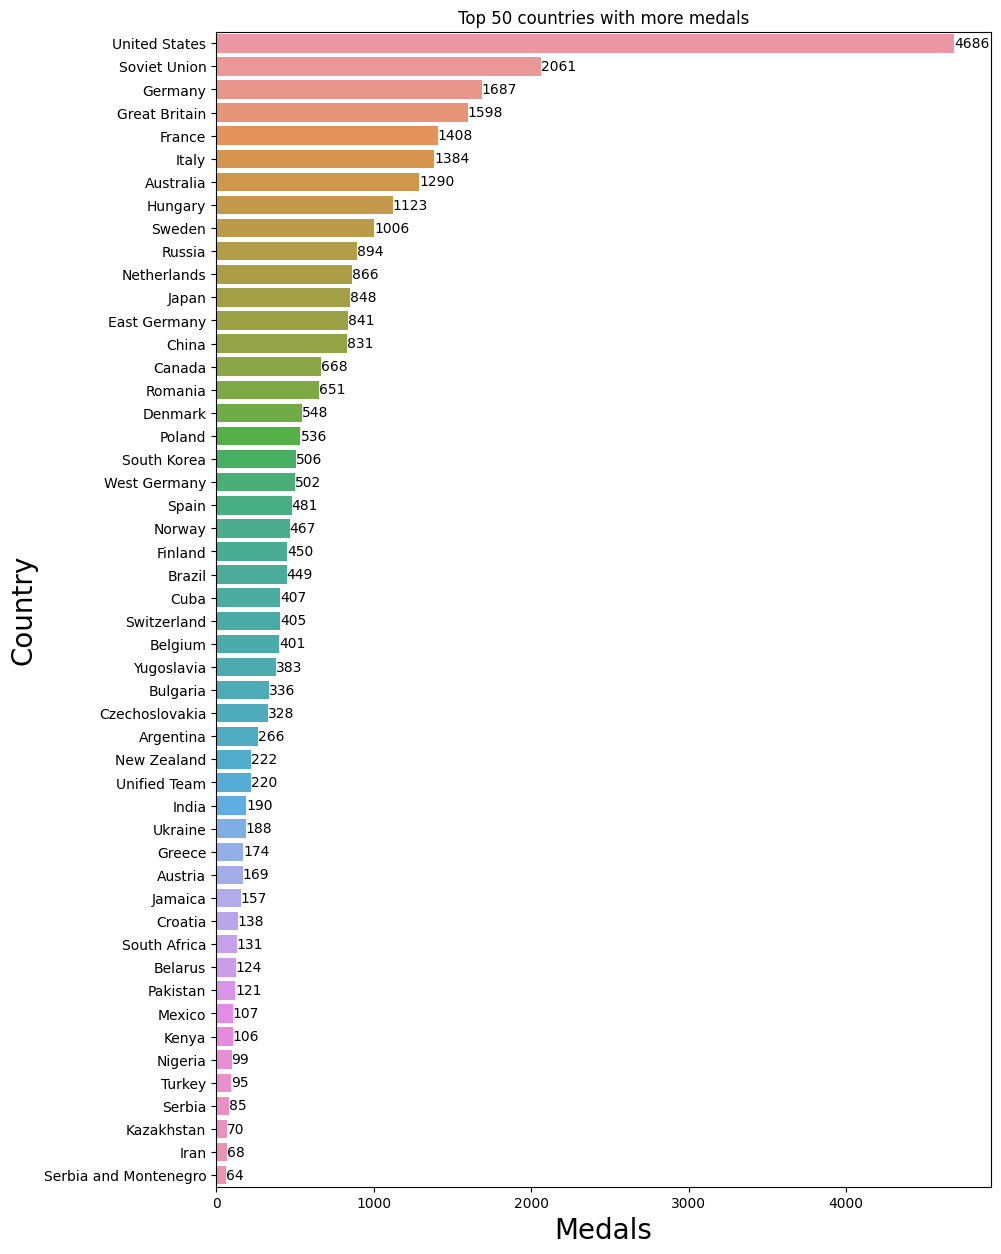

In [52]:
medallero_total=pd.DataFrame(medallero,columns=['Pais','Medallas']).sort_values(by='Medallas',ascending=False)
fig, ax = plt.subplots(figsize = (10, 15))
grafica3=sns.barplot(x='Medallas',y='Pais',data=medallero_total[:50],ax=ax)
grafica3.set_title('Top 50 countries with more medals')
grafica3.set_xlabel('Medals',size=20)
grafica3.set_ylabel('Country',size=20)
for i in grafica3.containers:
    grafica3.bar_label(i)

### A3 - Machine Learning 

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

In [20]:
for i in range(len(datos_atletismo)):
    if datos_atletismo['Medal'][i]=='G':
        datos_atletismo['Medal'][i]='Gold'
    elif datos_atletismo['Medal'][i]=='S':
        datos_atletismo['Medal'][i]='Silver'
    elif datos_atletismo['Medal'][i]=='B':
        datos_atletismo['Medal'][i]='Bronze'

In [21]:
for t in range(len(datos_atletismo)):
    if datos_atletismo['Event'][t]=='100M Men':
        datos_atletismo['Event'][t]="Athletics Men's 100 metres"
    elif datos_atletismo['Event'][t]=='100M Women':
        datos_atletismo['Event'][t]="Athletics Women's 100 metres"

In [22]:
atletas=datos_atletas[(datos_atletas['Event']=="Athletics Men's 100 metres")|(datos_atletas['Event']=="Athletics Women's 100 metres")]
atletas1=atletas[(atletas['Medal']=='Gold')|(atletas['Medal']=='Silver')|(atletas['Medal']=='Bronze')]

In [23]:
atletismo=datos_atletismo[(datos_atletismo['Event']=="Athletics Men's 100 metres")|(datos_atletismo['Event']=="Athletics Women's 100 metres")]
atletismo['NOC']=atletismo['Nationality']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19872\3574898629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atletismo['NOC']=atletismo['Nationality']


In [24]:
dataset_conjunto=atletas1.merge(atletismo,on=['Event','Year','Medal','NOC'],how='left')
for c in range(len(dataset_conjunto)):
    if dataset_conjunto['Sex'][c]=='M':
        dataset_conjunto['Sex'][c]=0
    elif dataset_conjunto['Sex'][c]=='F':
        dataset_conjunto['Sex'][c]=1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19872\1657347099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_conjunto['Sex'][c]=0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19872\1657347099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_conjunto['Sex'][c]=1


In [28]:
modelo=pd.DataFrame(dataset_conjunto,columns=['Age','Sex','Height','Weight','Result'])
train=modelo.dropna(axis=0)
train_data=train[train['Result']!='None']
train_data.sample(5)


,Age,Sex,Height,Weight,Result
71,24.0,0,178.0,77.0,10.8
9,30.0,1,175.0,63.0,11.9
81,23.0,0,188.0,80.0,9.99
113,25.0,1,167.0,53.0,11.08
17,25.0,1,175.0,58.0,10.83


In [29]:
train_data.Result=train_data.Result.astype(float)
train_data.Sex=train_data.Sex.astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19872\3180632385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Result=train_data.Result.astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19872\3180632385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Sex=train_data.Sex.astype(int)


In [30]:
lab = preprocessing.LabelEncoder()
resultados=train_data['Result']
y_transformed = lab.fit_transform(resultados)

valores_transformados=pd.DataFrame(train_data,columns=['Result','y_transformed'])
valores_transformados['y_transformed']=y_transformed
valores_transformados.sample(5)

,Result,y_transformed
119,10.70,31
127,11.50,64
151,10.96,44
149,10.80,35
72,11.60,65


In [31]:
X = train_data[['Age', 'Sex', 'Weight', 'Height']]
y = valores_transformados[['y_transformed']]
print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (135, 4)
y shape= (135, 1)


In [32]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.1, random_state= 3)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (121, 4)
X_test dimension=  (14, 4)
y_train dimension=  (121, 1)
y_test dimension=  (14, 1)


## Decicion Tree Clasifier

In [33]:
cls = tree.DecisionTreeClassifier(random_state= 1)

In [34]:
cls

DecisionTreeClassifier(random_state=1)

In [35]:
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [36]:
score=cls.score(X_test, y_test)

In [37]:
Edad=int(input('Introduce la edad:'))
Sexo=int(input('Introduce el sexo(0: Hombre,1: Mujer):'))
Peso=int(input('Introduce el peso (kg):'))
Altura=int(input('Introduce la altura (cm):'))
prediccion=(cls.predict([[Edad,Sexo,Peso,Altura]]))[0]
print(f"Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo:")
print(valores_transformados[valores_transformados['y_transformed']==prediccion]['Result'].unique()[0],'segundos')

Introduce la edad: 25
Introduce el sexo(0: Hombre,1: Mujer): 0
Introduce el peso (kg): 75
Introduce la altura (cm): 180


Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo:
10.02 segundos


C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## MLP para Regresión

In [38]:
import tensorflow as tf
from numpy import set_printoptions
from numpy import argmax
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
Y=train_data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features=X_train.shape[1]

(121, 4) (14, 4) (121,) (14,)


In [47]:
#definir el modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compila el modelo
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 66.5477
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 10.9177
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 25.2176
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 19.3343
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 8.5926
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 12.0522
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 12.0168
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 9.0190
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 9.6095
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 9.6612
Epoch 11/150
4/4 [==============================] - 0s 5ms/step - loss: 8.2225
Epoch 12/150
4/4 [==============================] - 0s 3ms/step - loss: 8.4313
Epoch 13/150
4/4 [==============================] - 0s 

In [48]:
error = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')
# realizar la prediccion
row = [Edad,Sexo,Peso,Altura]
y_pred = model.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred[0][0]}')

MSE: 0.567, RMSE: 0.753
1/1 [==============================] - 0s 96ms/step
Predicted: 10.642451286315918


In [49]:
print(f"Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo:")
print(f"Edad:{Edad}, Sexo:{Sexo}, Peso:{Peso}, Altura:{Altura}, hará un tiempo de {y_pred[0][0]} segundos")

Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo:
Edad:25, Sexo:0, Peso:75, Altura:180, hará un tiempo de 10.642451286315918 segundos
